# Machine Learning Coursera 

Exercise 2.2 : Regularised Logistic regression

In this exercise we will to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.we already have test results for some microchips on two different tests (0 for rejected and 1 for accepted).From these two tests results we will determine whether the microchips should be accepted or rejected.

## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Status'])
data.head()

,Test 1,Test 2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Now we will plot the the data for better visualisation.Let's see how it look like.

## ===================== Plotting ======================

In [3]:
def plotData() : 
    Accepted = data[data['Status'].isin([1])]
    Rejected = data[data['Status'].isin([0])]

    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(Accepted['Test 1'], Accepted['Test 2'], s=50, c='g', marker='o', label='Accepted')
    ax.scatter(Rejected['Test 1'], Rejected['Test 2'], s=50, c='r', marker='+', label='Rejected')
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')

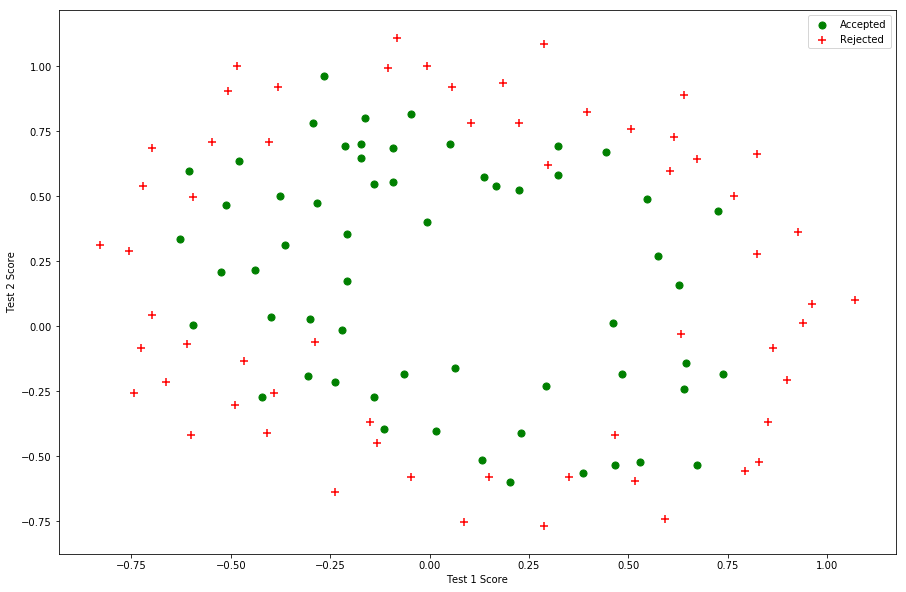

In [4]:
plotData()

In [5]:
def sigmoid(z):                        ## defining sigmoid i.e, y = 1 /( 1 + e^(-ax + b))
    return (1 /( 1 + np.exp(-z)))

## ===================== Feature Mapping ======================

Basically the data given is not linearly separable thus we add more features manually for the best decision boundary.

In [6]:
def mapFeature(X1, X2) :
    degree = 6
    m = X1.shape[0]
    new = np.ones(( m, sum(range(degree + 2)) ))
    curr = 1
    for i in range(1, degree+1):
        for j in range(0, i+1):
            new[:,curr] = np.power(X1, i-j) * np.power(X2, j)
            curr += 1              
    return new

In [7]:
X1 = data['Test 1']
X2 = data['Test 2']

data.insert(3, 'Ones', 1)
X = mapFeature(X1, X2)
#data.drop('Test 1', axis=1, inplace=True)
#data.drop('Test 2', axis=1, inplace=True)
#data

This is the curve of sigmoid function now we will define cost function

## ======================= Cost Function ======================

As we know,
        
            Cost( h(x), y) = { -log( h(x)); if y = 1
                               -log(1 - h(x)); if y = 0 }
                               
instead of defining both function we can rewrite it as,

            Cost( h(x), y) = { - y*log( h(x)) - (1 - y)*log(1 - h(x))  
            
we will regularize logistic regression. As a result, we can avoid overfitting i.e,

            Cost( h(x), y) = { - y*log( h(x)) - (1 - y)*log(1 - h(x))  + reg
     
                     where  reg = ( learning_rate / 2 * m ) * sum ( theta^2 )    

now we will define the cost function to compute the error.

In [8]:
def cost(theta, X, y, l):                         ## defining the cost function (error function) to compute cost
    m = len(y)
    J = 0
    X = np.matrix(X)
    y = np.matrix(y)
    
    h_theta = sigmoid(np.dot(X, theta))
    
    y1 = y * (np.log(h_theta))
    
    y2 = (1-y) * (np.log( 1 - h_theta )) 
#    print(X.shape, theta.shape, y.shape, h_theta.shape, y1.shape, y2.shape)
    reg = ( float(l) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(y1 + y2).sum() + reg
    
    return J    

In [9]:
def Cost(theta, X, y, l):                         ## defining the cost function (error function) to compute cost
    m = len(y)
    J = 0
    X = np.matrix(X)
    y = np.matrix(y)
    
    h_theta = sigmoid(np.dot(X, theta)).T
    
    y1 = y * (np.log(h_theta))
    
    y2 = (1-y) * (np.log( 1 - h_theta )) 
#    print(X.shape, theta.shape, y.shape, h_theta.shape, y1.shape, y2.shape)
    reg = ( float(l) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(y1 + y2).sum() + reg
    
    return J    

In [10]:
y = data['Status']
lamda = 0.1
#learning_rate = 1
theta = np.zeros((X.shape[1],1))
initial_cost = cost(theta, X, y, lamda)
initial_cost

0.69314718055994529

This may be high cost and now we have to minimise it after optimizing the theta

## ======================= Optimize Theta =======================

In [11]:
def Gradient(theta, X, y, lamda):
#   print(theta.shape,X.shape,y.shape)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h_theta = np.matrix(sigmoid(np.dot(X, theta)))
    error = (h_theta - y.T)
    print(h_theta.shape, y.shape)
    grad = (1.0/118) * (X.transpose().dot(error))
    grad[1:,:] =grad[1:,:]+(lamda/118)*theta[1:,:]
    
    return grad

In [12]:
def gradient(theta, X, y, lamda):
#   print(theta.shape,X.shape,y.shape)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h_theta = np.matrix(sigmoid(np.dot(X, theta.T)))
    error = (h_theta - y.T)
    print(h_theta.shape, y.shape, theta.shape, X.shape)
    grad = (1.0/118) * (np.dot(X.T, error))
    print(h_theta.shape, y.shape, theta.shape, X.shape, grad.shape)
    grad = grad + ( lamda / 118 ) * theta 
    
    return grad

In [13]:
grad = Gradient(theta, X, y, lamda)

(118, 1) (1, 118)


In [14]:
import scipy.optimize as opt

def optimizeTheta(theta, X, y, l):
    result =  opt.fmin_bfgs(Cost, x0 = theta, args = (X, y , l))
    return result

In [15]:
theta_new = optimizeTheta(theta,X,y,lamda)
theta_new

Optimization terminated successfully.
         Current function value: 0.394594
         Iterations: 91
         Function evaluations: 2760
         Gradient evaluations: 92


array([ 2.75387795,  1.80509518,  2.95728951, -4.2141521 , -3.38139843,
       -4.22754327,  0.74698711, -1.08013027, -0.46723567, -0.49721507,
       -3.26667788,  0.52615718, -1.76682126, -1.20879173, -2.77314047,
       -0.61886977, -0.4689006 ,  0.62141472, -1.13869881, -1.20528514,
       -0.0941234 , -2.63058676,  0.44698594, -0.73800436,  0.42300664,
       -1.14838944, -0.95609206, -1.15022854])

In [16]:
Cost(theta_new, X, y, lamda)

0.39459425928563296

This is our minimum cost, now we will make prediction on the given Marks.

## ======================= Prediction =======================



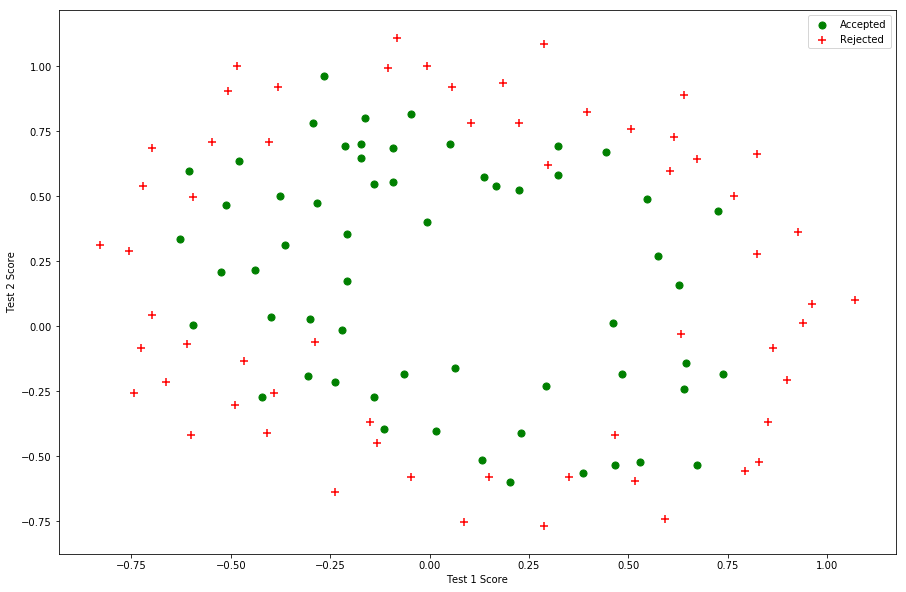

In [17]:
plotData()

In [18]:
def predict(theta, X):
    
    htheta = sigmoid(np.dot(X, theta))
    
    return np.array([1 if h > 0.5 else 0 for h in htheta])

In [19]:
Test = pd.read_csv('testdata2.txt', header=None, names=['Test1', 'Test2'])
Test.head()
test1 = Test['Test1']
test2 = Test['Test2']
Test.insert(2, 'Ones', 1)
T = mapFeature(test1, test2) 
probability = float(predict(theta_new, T))
Test.drop('Ones', axis=1, inplace=True)
print('For a Microchip with Test scores') 
print(Test)
if probability > 0.5:
    print('It may be accepted')
else :
    print('It may be rejected')

For a Microchip with Test scores
     Test1    Test2
0  0.14919 -0.57968
It may be rejected
